We will be attempting to cover the following topics: data creation, manipulation, and visualization as well as statistics using the Python programming language.  We try to introduce basic and important topics while keeping it "high-level", focusing on the practicality AND approachability of venturing into the world of programming and statistics. You can find more information about Python at [www.python.org]

In [1]:
!pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We will use some packages from the Python universe to create, collect, and manipulate data as well as do some statistics.

Some common packages used for these tasks are Pandas, which is a libary that contains specialized data structures that mimic what you would see in an Excel/Google Sheets file.  Numpy is Python's go to numerical computing package for fast computation.  matplotlib is a library for plotting graphs and statsmodels is one of many statisticial packages in the Python universe.

In [3]:
#like excel in Python
import pandas as pd 

#for fast numerical computing
import numpy as np 

# plotting graphs
import matplotlib.pyplot as plt


# for stats, such as linear regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [4]:
# Seed for reproducibility
np.random.seed(42)

We are going to generate some data to work with, so we can show how to manipulate it and do some statisitics with it.

In [5]:
# Generate data and store in collection called a dictionary (to be explained)
data = {
    # Select 50 inspectors from a list of 5 choices, all equally likely to be selected
    'Inspector': np.random.choice(['A', 'B', 'C', 'D', 'E'], 50),
    # Inspection duration around 60 minutes
    'Inspection_Duration': np.random.normal(60, 10, 50),  #mean 60, stdev 10, size 50
    # Inspector scores between 70 and 100
    'Score': np.random.randint(70, 100, 50)  #min 70, max 100, 50 samples 
}

In [6]:
data #this creates a dictionary of variable name : array of values

{'Inspector': array(['D', 'E', 'C', 'E', 'E', 'B', 'C', 'C', 'C', 'E', 'D', 'C', 'E',
        'B', 'D', 'B', 'D', 'E', 'A', 'D', 'B', 'E', 'D', 'A', 'A', 'C',
        'C', 'B', 'D', 'D', 'C', 'D', 'D', 'A', 'C', 'E', 'C', 'E', 'A',
        'B', 'D', 'A', 'D', 'B', 'B', 'A', 'B', 'E', 'B', 'D'], dtype='<U1'),
 'Inspection_Duration': array([67.79192635, 48.98902244, 71.30228194, 63.73118915, 56.13527049,
        48.41229758, 65.66112827, 52.9554655 , 46.22060696, 56.46883348,
        55.38534282, 60.66657279, 58.23714338, 72.00892772, 66.98398941,
        58.28371165, 50.9281342 , 71.88625726, 67.85532124, 86.56010091,
        62.6348604 , 76.41771116, 64.608163  , 60.85923472, 44.90042718,
        67.21502462, 51.56580077, 54.86674595, 59.56463198, 57.2469909 ,
        44.36933205, 52.04369008, 69.30584401, 66.7776741 , 66.98440259,
        61.73602064, 66.62284514, 62.41122163, 58.31794912, 71.64768646,
        57.54252313, 52.30332226, 72.12172342, 72.33496805, 44.25844713,
        66

In [7]:
data['Inspector'] # we can look at the array created by the previous code one by one

array(['D', 'E', 'C', 'E', 'E', 'B', 'C', 'C', 'C', 'E', 'D', 'C', 'E',
       'B', 'D', 'B', 'D', 'E', 'A', 'D', 'B', 'E', 'D', 'A', 'A', 'C',
       'C', 'B', 'D', 'D', 'C', 'D', 'D', 'A', 'C', 'E', 'C', 'E', 'A',
       'B', 'D', 'A', 'D', 'B', 'B', 'A', 'B', 'E', 'B', 'D'], dtype='<U1')

To work with this more easily we will turn it into something called a "DataFrame".  This is like an excel sheet, but we can access it programatically in Python.

In [8]:
df = pd.DataFrame(data)

This DataFrame is a list of 50 Inspections, each with a specific Inspector, Inspection Duration and a Score. Later, we will edit the data to create a scenario where one of the inspectors is not behaving like the rest.

In [9]:
df.head(10) #we can look at the first n rows of the data with the .head() notation.

,Inspector,Inspection_Duration,Score
0,D,67.791926,83
1,E,48.989022,76
2,C,71.302282,96
3,E,63.731189,78
4,E,56.135270,84
5,B,48.412298,84
6,C,65.661128,95
7,C,52.955465,79
8,C,46.220607,97
9,E,56.468833,82


Let's consider some ways in which we can access the data. What if we want to access row, or columns, or specific entries?

In [10]:
df['Inspector'].head(10) # we can access a column directly with df[col] notation
                         # we get a view called a Series which has [index value] pairs
                         # with the column name listed below the data

0    D
1    E
2    C
3    E
4    E
5    B
6    C
7    C
8    C
9    E
Name: Inspector, dtype: object

Let's give these generic inspectors names.  We do so by using a "name" dictionary that maps these generic Inspector Names to human names.

In [11]:
# dictionary is a data structure that holds key : value pairs and acts like a function
name = {'A': 'Connor Jones', 
        'B': 'James Smith', 
        'C': 'Kelly Trong', 
        'D': 'Peter Pots', 
        'E': 'Samantha Lake'}

For example, let's look at how name(A) works.

In [12]:
name['A']

'Connor Jones'

Let's "map" it to the whole data frame's Inspector column!  We do this simply by indexing into the "Inspector" column and "mapping" the dictionary over each entry.  That is, we apply "name" to every entry in the "Inspector" column.

In [13]:
df['Inspector'] = df['Inspector'].map(name) #replace the entire column with real names

In [14]:
df['Inspector'].head(10)

0       Peter Pots
1    Samantha Lake
2      Kelly Trong
3    Samantha Lake
4    Samantha Lake
5      James Smith
6      Kelly Trong
7      Kelly Trong
8      Kelly Trong
9    Samantha Lake
Name: Inspector, dtype: object

In [15]:
sorted(df['Inspector'].unique()) #we can get the unique values out of a series using .unique()
                                 #and we are using Python's built-in sorted function for convenience

['Connor Jones', 'James Smith', 'Kelly Trong', 'Peter Pots', 'Samantha Lake']

We can get another summary view of the Inspectors by printing a histogram.

<AxesSubplot:>

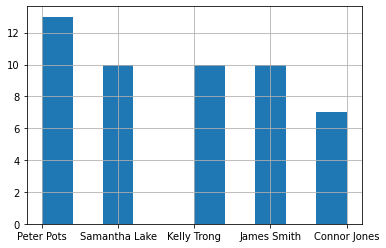

In [16]:
df['Inspector'].hist() # we see that there's pretty much the same amount of inspections
                       # by each inspector
                       # we use the .hist() [short for histogram] method
                       # for a quick visualization


This simply implies we have enough representation from each group (Inspector) to do comparisons later on.

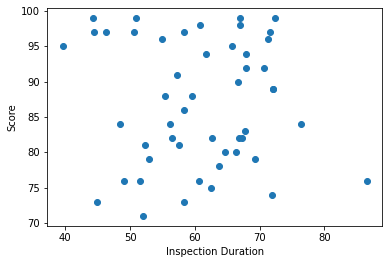

In [17]:
# plot the Score's as a function of the Inspection Duration
plt.scatter(df['Inspection_Duration'], df['Score'])
plt.xlabel('Inspection Duration')
plt.ylabel('Score')
plt.show()

An aside about notation

In [18]:
#let's assign a variable x to an integer.
x = 1

# we will "mutate" or change the variable by adding one to it, and saving it
x = x + 1 

# checks if the left and right of == are the same value
x == 2 

True

In [19]:
#now let's see the short hand
x = 1
x += 1 #instead of x = x + 1
x == 2

True

We will also use a very powerful method of a data frame called "loc" to return the Scores where the Inspector is Connor.

But first, let's examine a way to use the "==" operator with dataframes

In [20]:
df['Inspector'] == 'Connor Jones' #we ask for which rows is the Inspector Connor Jones?

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22    False
23     True
24     True
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33     True
34    False
35    False
36    False
37    False
38     True
39    False
40    False
41     True
42    False
43    False
44    False
45     True
46    False
47    False
48    False
49    False
Name: Inspector, dtype: bool

In [21]:
# we can use loc notation to access with finer granularity

# first by saying we want to match rows where the inspector is "Connor Jones"
condition = df['Inspector'] == 'Connor Jones'

# and secondly say we just want the Score
column = 'Score'

df.loc[condition, column] # we get the 7 Scores Connor gave

18    92
23    98
24    73
33    82
38    97
41    81
45    80
Name: Score, dtype: int32

And so using a combination of the tools we just learned, we can edit Connor's scores and inspection times all at once to give the effect that Connor is behaving differently than everyone else.

In [22]:
# Making Connor's scores lower
df.loc[df['Inspector'] == 'Connor Jones', 'Score'] -= 20 

# Increasing Connor's inspection times
df.loc[df['Inspector'] == 'Connor Jones', 'Inspection_Duration'] += 30

Let's examine the Score as a function of the Inspection Duration again now after separating Connor from the pack.


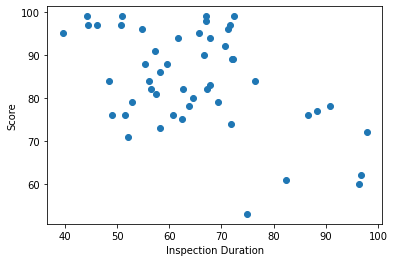

In [23]:
# plot the Score's as a function of the Inspection Duration
plt.scatter(df['Inspection_Duration'], df['Score'])
plt.xlabel('Inspection Duration')
plt.ylabel('Score')
plt.show() #Connor's Scores are lower and he's taking much more time

And now we will we will create a linear relationship between Score and Inspection Duration so we can do linear regression later.

In [24]:
# Introduce a linear relationship between inspection duration and score
# Longer inspections lead to slightly lower scores, which will be revealed statistically
df['Score'] -= (df['Inspection_Duration'] - 60) / 2

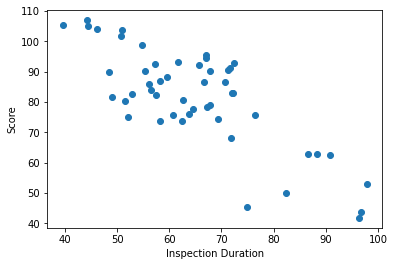

In [25]:
# plot the Score's as a function of the Inspection Duration
plt.scatter(df['Inspection_Duration'], df['Score'])
plt.xlabel('Inspection Duration')
plt.ylabel('Score')
plt.show() #the downard trend in the data we saw forming is now more pronounced

These edits to the data frame demonstrate the power of Pandas and the ability to view edit, and display data with very little code.

Onward towards data analysis. Let's consider the average score's that these inspectors give.

In [26]:
average_inspection_score = df.groupby('Inspector')['Score'].mean().reset_index()
average_inspection_score 

,Inspector,Score
0,Connor Jones,51.329039
1,James Smith,92.366711
2,Kelly Trong,89.021827
3,Peter Pots,84.079802
4,Samantha Lake,81.164626


"groupby" is shorthand for grouping the data frame by a columns values.  It always requires an aggregate function to be supplied (like mean, max, median, etc.).  Resetting the index is just for convenience.  Here we get the average score that each inspector gave across all of their inspections.

It looks like Connor Jones is scoring much lower than his coworkers. Is there a rigorous way of saying this? Yes, we can use statistics!  A famous statistician, John Tukey, developed a method for testing such a scenario. It is a test based on "Analysis of Variance", which allows us to rigourously compare means of groups.  That is, in a group of subjects, do the groups separate our dataset in a reasonble way?  It's obvious that separating scores by who gave them is meaningful, but in statistics, we need numerical reasoning.  For brevity, we are going to skip some steps that a statistician would do to justify using Tukey's method.

https://en.wikipedia.org/wiki/Analysis_of_variance

In [27]:
# ANOVA
# ols stands for oridinary least squares (a common metric for comparison)
# .fit() is a method that uses our data from the df
# Score ~ Inspector means let's examine the mean scores between Inspectors
anova_model_adjusted = ols('Score ~ Inspector', data=df).fit()

# anonva_lm takes our model we generated and examines it for a linear relationship
anova_table_adjusted = sm.stats.anova_lm(anova_model_adjusted, typ=2)

For brevity, this ANOVA is required to use Tukey's method, which is much more illustrative of the point we are trying to make.  Below, the table below simply confirms that we can look to Tukey's HSD and be confident in the conclusions we will make. (It's the fact the PR(>F) is close to zero that allows us to do so.) What it means is that the groups (inspectors) IS a good way to separate the scores into groups. This may seem obvious, but remember, we're trying to be rigourous!

In [28]:
anova_table_adjusted.loc['Inspector']['PR(>F)'] < 0.01

True

For those completely unfamiliar with statistics, we simply explain the following tests as ways to "rigourously" discover anomalies within data. Two key concepts are "p-value" and "rejecting the null hypothesis". A null hypothesis is usually some baseline statement like "the mean values between groups are roughly the same". P-value refers to the chance that a contradictory observation occurs randomly.  When it is very low, we do something called "rejecting the null hypothesis". So essentially, low p-value implies something anomalous is happening in your data.

https://en.wikipedia.org/wiki/Statistical_hypothesis_test

In [29]:
# Tukey's HSD, endog is the numerical variable, groups are the different inspectors,
# and alpha is related to the p-value (if p < alpha, reject!)
tukey_adjusted = pairwise_tukeyhsd(endog=df['Score'], groups=df['Inspector'], alpha=0.1)
tukey_adjusted.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Connor Jones,James Smith,41.0377,0.001,28.7618,53.3135,True
Connor Jones,Kelly Trong,37.6928,0.001,25.4169,49.9686,True
Connor Jones,Peter Pots,32.7508,0.001,21.0727,44.4288,True
Connor Jones,Samantha Lake,29.8356,0.001,17.5597,42.1114,True
James Smith,Kelly Trong,-3.3449,0.9,-14.485,7.7953,False
James Smith,Peter Pots,-8.2869,0.279,-18.7647,2.1908,False
James Smith,Samantha Lake,-11.2021,0.0969,-22.3422,-0.0619,True
Kelly Trong,Peter Pots,-4.942,0.7275,-15.4198,5.5357,False
Kelly Trong,Samantha Lake,-7.8572,0.3928,-18.9973,3.2829,False
Peter Pots,Samantha Lake,-2.9152,0.9,-13.3929,7.5626,False


Let's look at this table and recognize that it's comparing the means of each Inspector's Score together by taking their difference (group2 - group1), and doing Tukey's Test to generate a p-value.  For all of the ways we can compare someone to Connor, we see that we are always getting a small p-value.  So what we would conclude is that his average Score is different than everyone else's.  Explictly, we are rejecting the null hypothesis that there is no difference between Connor's average score and everyone else's average.

So now we have shown Connor is acting differently than his co-workers. Next we discover a possible cause: Connor is taking much longer to do his inspections than his coworkers.  

In [30]:
average_inspection_time = df.groupby('Inspector')['Inspection_Duration'].mean().reset_index()
average_inspection_time

,Inspector,Inspection_Duration
0,Connor Jones,89.627637
1,James Smith,57.466579
2,Kelly Trong,59.356346
3,Peter Pots,63.686549
4,Samantha Lake,62.670748


But we can't simply say this is the cause of the score unless we are sure that everyone who takes more time score's their inspectees lower.  And to "rigourously" justify this claim, we could perform a linear regression and show that independent of who's scoring, the Score drops whenever Inspection Duration increases. This will reveal statistically the negative relationship we introduced earlier.

What a linear regression does is fit a continuous line to a set of data points.  Like in Tukey's Test, we have a p-value and a null hypothesis.  What's different in this case is that our null hypothesis is a statement about the slope of the line that fits the data. The null hypothesis effectively says "there is no linear relationship between Score and Inspection Duration".  But if we find a line that fits the data nicely, has a non-zero slope (with a low p-value), we have discovered a (non-random) trend.  And with this discovery, we could justify approaching Connor with data backed questions about his Scores and Inspection Durations.

In [31]:
# Linear Regression boiler plate (code you repeat to get an expected effect)
X = df['Inspection_Duration'] #the variable we think is affecting Score
y = df['Score'] #the variable we want to confirm is affected by Inspection Duration

# We are required to add a constant in statsmodels (this is b in y = mx + b)
X = sm.add_constant(X)  # Adds a constant term to the predictor
lr_model = sm.OLS(y, X).fit() #fit the model to our data


print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     75.58
Date:                Tue, 26 Mar 2024   Prob (F-statistic):           2.01e-11
Time:                        10:51:57   Log-Likelihood:                -185.42
No. Observations:                  50   AIC:                             374.8
Df Residuals:                      48   BIC:                             378.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 139.7857    

This table has an incredible amount of detail that is useful to statisticians. But for our lesson today, we are simply focusing on p-values and rejecting the null hypothesis. This model's p-value is sufficiently low so we conclude that this is a good-fitting linear model. Additionally, we see an "Adjusted R-squared" of .603 which essentially means that this model explains 60% of the variation in the data.

https://en.wikipedia.org/wiki/Coefficient_of_determination

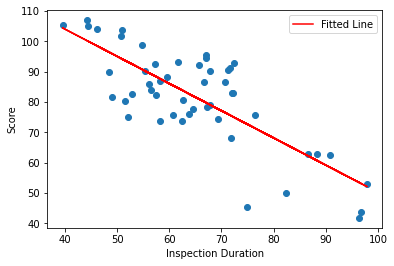

In [33]:
#plot the data points
plt.scatter(X['Inspection_Duration'], y)

#plot the linear regression fitted line
plt.plot(X['Inspection_Duration'], 
         lr_model.fittedvalues, # the predicted scores based on the data given
         'r-', #color and type of line 
         label="Fitted Line")

#decorate the axes with labels and a legend
plt.xlabel('Inspection Duration')
plt.ylabel("Score")
plt.legend()

plt.show()